In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from collections import defaultdict

# from plotnine import *
from scipy import stats

sns.set_style("whitegrid")

In [2]:
with open("../ptu_derep/complete_plasmids_derep.txt") as f:
    complete = [i.strip() for i in f]

In [3]:
df = pd.read_csv("../arg/amrfinder_results_derep.tsv", sep="\t")

df["taxon_oid"] = df["Protein identifier"].apply(
    lambda x: (
        "_".join(x.split("_")[0:-1])
        if any(i for i in ["PLSDB", "Refsoil"] if i in x)
        else x.split("_")[2]
        if "IMGPR" in x
        else x.split("|")[0]
    )
)


df["Plasmid"] = df["Protein identifier"].apply(
    lambda x: "_".join(x.split("_")[:-1]) if "IMGPR" not in x else x.split("|")[0]
)

df["Origin"] = df["Protein identifier"].apply(
    lambda x: (
        "Isolate" if any(i for i in ["IMGPR", "PLSDB", "Refsoil"] if i in x) else "Meta"
    )
)

df["Complete"] = df["Plasmid"].apply(lambda x: x in complete)

df["Class"] = df["Class"].fillna(df["Element subtype"])

df.head()

,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,Target length,...,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,taxon_oid,Plasmid,Origin,Complete
0,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,182,...,65.38,156,AAN67541.1,arsinothricin resistance N-acetyltransferase A...,NF040504.1,arsinothricin resistance N-acetyltransferase A...,2124908023,2124908023|SwBS_Contig_18,Meta,False
1,2124908023|SwBS_Contig_2248_5,arsN2,arsenic resistance N-acetyltransferase ArsN2,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,155,...,46.03,126,KTT96020.1,arsenic resistance N-acetyltransferase ArsN2,NF040501.1,arsenic resistance N-acetyltransferase ArsN2,2124908023,2124908023|SwBS_Contig_2248,Meta,False
2,2209111021|2221179945_197,arsN2,arsenic resistance N-acetyltransferase ArsN2,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,153,...,45.90,122,KTT96020.1,arsenic resistance N-acetyltransferase ArsN2,NF040501.1,arsenic resistance N-acetyltransferase ArsN2,2209111021,2209111021|2221179945,Meta,False
3,2209111021|2221179945_198,merB,organomercurial lyase MerB,plus,STRESS,METAL,MERCURY,ORGANOMERCURY,HMM,219,...,56.81,213,AAA88369.1,organomercurial lyase MerB,NF033555.1,organomercurial lyase MerB,2209111021,2209111021|2221179945,Meta,False
4,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,copA,laccase-like oxidase CopA,plus,STRESS,METAL,COPPER,COPPER,BLASTP,623,...,99.04,623,ADR70747.1,laccase-like oxidase CopA,NaN,NaN,3300000519,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,Meta,False


In [4]:
df[df["Protein identifier"].str.contains("IMGPR_plasmid_2744054556_000002")]

,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,Target length,...,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,taxon_oid,Plasmid,Origin,Complete
1025,IMGPR_plasmid_2744054556_000002|2744067052|274...,asr,acid resistance repetitive basic protein Asr,plus,STRESS,ACID,ACID,NaN,HMM,154,...,62.26,106,BAA15331.2,acid resistance repetitive basic protein Asr,NF033636.1,acid resistance repetitive basic protein Asr,2744054556,IMGPR_plasmid_2744054556_000002,Isolate,False
1026,IMGPR_plasmid_2744054556_000002|2744067052|274...,blaLEN-16,class A beta-lactamase LEN-16,core,AMR,AMR,BETA-LACTAM,BETA-LACTAM,ALLELEP,286,...,100.00,286,WP_023297577.1,class A beta-lactamase LEN-16,NF000233.2,LEN family class A beta-lactamase,2744054556,IMGPR_plasmid_2744054556_000002,Isolate,False


In [5]:
df_mob = pd.read_csv("../conjscan/MOB_types.tsv", sep="\t")
df_mob["taxon_oid"] = df_mob["Plasmid"].apply(
    lambda x: x.split("|")[0] if "IMGPR" not in x else x.split("_")[2]
)
df_mob.head()

,Protein,Plasmid,MOB_type,taxon_oid
0,2162886007|SwRhRL2b_contig_2129928_14,2162886007|SwRhRL2b_contig_2129928,MOB_B,2162886007
1,2162886007|SwRhRL2b_contig_2418591_32,2162886007|SwRhRL2b_contig_2418591,MOB_B,2162886007
2,3300000363|ICChiseqgaiiFebDRAFT_11478459_1,3300000363|ICChiseqgaiiFebDRAFT_11478459,MOB_B,3300000363
3,3300001979|JGI24740J21852_10002113_7,3300001979|JGI24740J21852_10002113,MOB_B,3300001979
4,3300001989|JGI24739J22299_10001307_5,3300001989|JGI24739J22299_10001307,MOB_B,3300001989


In [6]:
df[df["Plasmid"] == "PLSDB_NZ_CP067067.1"]

,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,Target length,...,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,taxon_oid,Plasmid,Origin,Complete
1893,PLSDB_NZ_CP067067.1_136,aac(6')-IIc,aminoglycoside N-acetyltransferase AAC(6')-IIc,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN/KANAMYCIN/TOBRAMYCIN,EXACTP,194,...,100.00,193,WP_012695484.1,aminoglycoside N-acetyltransferase AAC(6')-IIc,NF000135.2,aminoglycoside N-acetyltransferase AAC(6')-IIc,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True
1894,PLSDB_NZ_CP067067.1_139,aac(3)-IIg,aminoglycoside N-acetyltransferase AAC(3)-IIg,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN,EXACTP,270,...,100.00,269,WP_012695485.1,aminoglycoside N-acetyltransferase AAC(3)-IIg,NF033080.0,AAC(3)-II family aminoglycoside N-acetyltransf...,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True
1895,PLSDB_NZ_CP067067.1_140,arr,NAD(+)--rifampin ADP-ribosyltransferase,core,AMR,AMR,RIFAMYCIN,RIFAMYCIN,EXACTP,138,...,100.00,137,WP_012695486.1,NAD(+)--rifampin ADP-ribosyltransferase,NF000066.1,NAD(+)--rifampin ADP-ribosyltransferase,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True
1896,PLSDB_NZ_CP067067.1_141,ere(A),EreA family erythromycin esterase,core,AMR,AMR,MACROLIDE,ERYTHROMYCIN,PARTIALP,349,...,100.00,346,WP_021566672.1,EreA family erythromycin esterase,NF000208.1,EreA family erythromycin esterase,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True
1897,PLSDB_NZ_CP067067.1_142,qacEdelta1,quaternary ammonium compound efflux SMR transp...,core,STRESS,BIOCIDE,QUATERNARY AMMONIUM,QUATERNARY AMMONIUM,ALLELEP,116,...,100.00,115,WP_000679427.1,quaternary ammonium compound efflux SMR transp...,NF000276.2,quaternary ammonium compound efflux SMR transp...,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True
1898,PLSDB_NZ_CP067067.1_143,sul1,sulfonamide-resistant dihydropteroate synthase...,core,AMR,AMR,SULFONAMIDE,SULFONAMIDE,EXACTP,280,...,100.00,279,WP_000259031.1,sulfonamide-resistant dihydropteroate synthase...,NF000294.1,sulfonamide-resistant dihydropteroate synthase...,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True
1899,PLSDB_NZ_CP067067.1_153,qnrB4,quinolone resistance pentapeptide repeat prote...,core,AMR,AMR,QUINOLONE,QUINOLONE,ALLELEP,215,...,100.00,214,WP_017900990.1,quinolone resistance pentapeptide repeat prote...,NF000420.1,QnrB family quinolone resistance pentapeptide ...,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True
1900,PLSDB_NZ_CP067067.1_16,terW,tellurium resistance protein TerW,plus,STRESS,METAL,TELLURIUM,TELLURIUM,EXACTP,156,...,100.00,155,AAC44736.1,tellurium resistance protein TerW,NaN,NaN,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True
1901,PLSDB_NZ_CP067067.1_160,blaDHA-1,extended-spectrum class C beta-lactamase DHA-1,core,AMR,AMR,BETA-LACTAM,CEPHALOSPORIN,ALLELEP,380,...,100.00,379,WP_004236386.1,extended-spectrum class C beta-lactamase DHA-1,NF012102.1,DHA family class C beta-lactamase,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True
1902,PLSDB_NZ_CP067067.1_164,sul1,sulfonamide-resistant dihydropteroate synthase...,core,AMR,AMR,SULFONAMIDE,SULFONAMIDE,PARTIALP,156,...,100.00,155,WP_000259018.1,sulfonamide-resistant dihydropteroate synthase...,NaN,NaN,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1,Isolate,True


In [7]:
def collapse_class_per_type(row):
    total_vals_per_class = df["Class_fixed"].value_counts()
    if total_vals_per_class[row["Class_fixed"]] < 30:
        return f"OTHER-{row['Element type']}"
    else:
        return row["Class_fixed"]

In [8]:
df["Class_fixed"] = df["Class"].apply(lambda x: x.split("/")[0])
df["Class_custom"] = df.apply(collapse_class_per_type, axis=1)
df["Element_subtype_info"] = df["Element type"] + "-" + df["Element subtype"]

Despite the absence of any currently elevated concentrations of
383 heavy metals, a previous study noted high abundance of metal resistance genes in the pristine
384 wells at OR-FRC (Hemme et al., 2015), and hypothesized that they might be present on a
385 plasmid. This study confirms that several metal resistance genes are indeed encoded on plasmids (https://www.biorxiv.org/content/biorxiv/early/2017/03/08/113860)

In [9]:
df_lengths = pd.read_csv("../ptu_derep/derep_plasmids_lengths.tsv", sep="\t")
df_lengths.head()

,Plasmid,length
0,2088090014|GPIPI_16944593,5584
1,2088090014|GPIPI_16884012,8233
2,2088090014|GPIPI_17035422,5654
3,2088090014|GPIPI_17320127,5097
4,2088090014|GPIPI_16557027,6619


In [10]:
df_lengths["joinable_name"] = df_lengths["Plasmid"].apply(
    lambda x: x.split("|")[0] if "IMGPR" in x else x
)

In [11]:
df = df.join(
    df_lengths.drop("Plasmid", axis=1).set_index("joinable_name"), on="Plasmid"
)

In [12]:
df_conjscan = pd.read_csv(
    "../conjscan/all_best_solution_summary_derep.tsv",
    sep="\t",
    comment="#",
    index_col=0,
)
df_conjscan.columns = [x.split("/")[-1] for x in df_conjscan.columns]
df_conjscan.reset_index(inplace=True)
t4ss_columns = [col for col in df_conjscan.columns if col.startswith("T4SS")]
df_conjscan["CONJ"] = df_conjscan[t4ss_columns].sum(axis=1)
dconj_columns = [col for col in df_conjscan.columns if col.startswith("dCONJ_")]
df_conjscan["dCONJ"] = df_conjscan[dconj_columns].sum(axis=1)
df_conjscan = df_conjscan[["replicon", "MOB", "CONJ", "dCONJ"]]
df_conjscan.head()

,replicon,MOB,CONJ,dCONJ
0,2088090015|GPICI_8721071,1,0,0
1,2088090015|GPICI_8837489,1,0,0
2,2088090015|GPICI_8880022,1,0,0
3,2088090015|GPICI_8946463,1,0,0
4,2088090015|GPICI_9100369,1,0,0


In [13]:
df["joinable_name"] = df["Plasmid"].apply(
    lambda x: "_".join(x.split("_")[0:-1]) if "IMGPR" in x else x
)
df = df.join(df_conjscan.set_index("replicon"), on="joinable_name").drop(
    ["joinable_name", "Class_fixed"], axis=1
)

In [14]:
df_ptu = pd.read_csv(
    "../ptu_derep/derep_plasmids_clusters_with_ptu_ids.tsv",
    sep="\t",
    header=None,
    index_col=0,
)
ptus_mapping = {}
for ptu in df_ptu.index:
    for plasmid in df_ptu.loc[ptu, 2].split(","):
        plasmid = plasmid.split("|")[0] if "IMGPR" in plasmid else plasmid
        ptus_mapping[plasmid] = ptu
df["PTU"] = df["Plasmid"].apply(lambda x: ptus_mapping.get(x, np.nan))
df = df.dropna(subset=["PTU"])
df.head()

,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,Target length,...,Plasmid,Origin,Complete,Class_custom,Element_subtype_info,length,MOB,CONJ,dCONJ,PTU
0,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,182,...,2124908023|SwBS_Contig_18,Meta,False,ARSENIC,STRESS-METAL,23542.0,0.0,0.0,0.0,PTU-06617
2,2209111021|2221179945_197,arsN2,arsenic resistance N-acetyltransferase ArsN2,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,153,...,2209111021|2221179945,Meta,False,ARSENIC,STRESS-METAL,168511.0,0.0,1.0,0.0,PTU-06638
3,2209111021|2221179945_198,merB,organomercurial lyase MerB,plus,STRESS,METAL,MERCURY,ORGANOMERCURY,HMM,219,...,2209111021|2221179945,Meta,False,MERCURY,STRESS-METAL,168511.0,0.0,1.0,0.0,PTU-06638
4,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,copA,laccase-like oxidase CopA,plus,STRESS,METAL,COPPER,COPPER,BLASTP,623,...,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,Meta,False,COPPER,STRESS-METAL,133473.0,0.0,0.0,0.0,PTU-09880
5,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,copB,copper-binding protein CopB,plus,STRESS,METAL,COPPER,COPPER,EXACTP,423,...,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,Meta,False,COPPER,STRESS-METAL,133473.0,0.0,0.0,0.0,PTU-09880


In [15]:
df_hosts = pd.read_csv(
    "../crispr_search/plasmid_host_taxonomy_consolidated_all_possible_hosts_final_derep.tsv",
    sep="\t",
)

df_hosts.head()

,Plasmid,host,method
0,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast
1,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast
2,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast
3,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast
4,2088090015|GPICI_8721071,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,iphop-blast


In [16]:
df = df.join(df_hosts.set_index("Plasmid")["host"], on="Plasmid")

In [17]:
df = df.join(df_mob.set_index("Plasmid")[["MOB_type"]], on="Plasmid")

df.head()

,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,Target length,...,Complete,Class_custom,Element_subtype_info,length,MOB,CONJ,dCONJ,PTU,host,MOB_type
0,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,182,...,False,ARSENIC,STRESS-METAL,23542.0,0.0,0.0,0.0,PTU-06617,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN
0,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,182,...,False,ARSENIC,STRESS-METAL,23542.0,0.0,0.0,0.0,PTU-06617,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN
0,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,182,...,False,ARSENIC,STRESS-METAL,23542.0,0.0,0.0,0.0,PTU-06617,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN
0,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,182,...,False,ARSENIC,STRESS-METAL,23542.0,0.0,0.0,0.0,PTU-06617,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN
0,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,182,...,False,ARSENIC,STRESS-METAL,23542.0,0.0,0.0,0.0,PTU-06617,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN


In [18]:
taxonomic_levels = ["d__", "p__", "c__", "o__", "f__", "g__", "s__"]
split_taxonomy = df.set_index("Plasmid")["host"].str.split(";", expand=True)
split_taxonomy.columns = [f"{x}" for x in taxonomic_levels]
df = df.set_index("Plasmid").join(split_taxonomy).reset_index(names="Plasmid")
df = df.drop_duplicates(subset=["Plasmid", "Protein identifier"])
df["new_o__"] = df["o__"].apply(
    lambda x: (
        "Other" if pd.isna(x) else x if df["o__"].value_counts()[x] > 28 else "Other"
    )
)
# df['new_o__'] =
# Merging with the original dataframe
# pd.concat([df, split_host_iphop], axis=1)
# # df_all = df_all.drop("s__", axis=1)
# df_all.head()


# df[["d__", "p__", "c__", "o__", "f__", "g__"]] = df_all[
#     ["d__", "p__", "c__", "o__", "f__", "g__"]
# ].applymap(
#     lambda x: "Unknown"
#     if pd.isnull(x)
#     else x.split("__")[1]
#     if x.split("__")[1]
#     else "Unknown"
# )

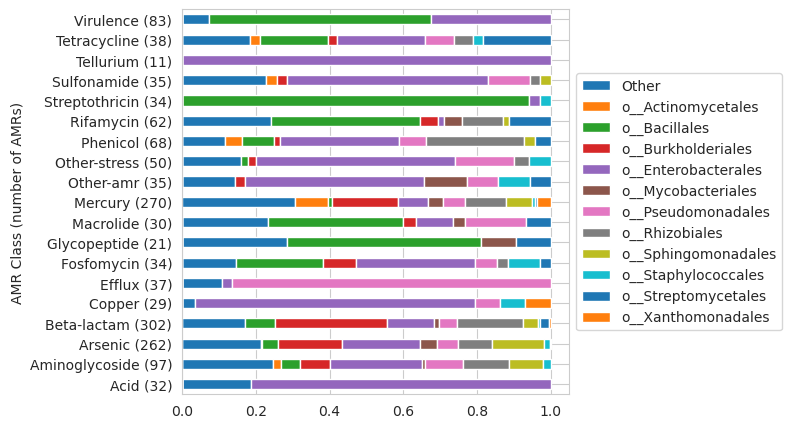

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))
a = (
    df.drop_duplicates(subset=["Plasmid", "Class_custom", "new_o__"])
    .groupby(["Class_custom"])["new_o__"]
    .value_counts()
    .unstack()
    .fillna(0)
)
total_amr = a.sum(axis=1).to_dict()
a.apply(lambda x: x / x.sum(), axis=1).plot(kind="barh", stacked=True, ax=ax)
ax.set_yticklabels(
    [
        f"{i.get_text().capitalize()} ({int(total_amr[i.get_text()])})"
        for i in ax.get_yticklabels()
    ]
)
ax.set_ylabel("AMR Class (number of AMRs)")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
fig.savefig("../figures/amr/amr_class_per_host.pdf", bbox_inches="tight")

Any difference in resistances between MOB types?

In [20]:
df.columns

Index(['Plasmid', 'Protein identifier', 'Gene symbol', 'Sequence name',
       'Scope', 'Element type', 'Element subtype', 'Class', 'Subclass',
       'Method', 'Target length', 'Reference sequence length',
       '% Coverage of reference sequence', '% Identity to reference sequence',
       'Alignment length', 'Accession of closest sequence',
       'Name of closest sequence', 'HMM id', 'HMM description', 'taxon_oid',
       'Origin', 'Complete', 'Class_custom', 'Element_subtype_info', 'length',
       'MOB', 'CONJ', 'dCONJ', 'PTU', 'host', 'MOB_type', 'd__', 'p__', 'c__',
       'o__', 'f__', 'g__', 's__', 'new_o__'],
      dtype='object')

In [21]:
# out of all unique plasmids/element type, how many have each MOB type

mob_res = (
    df.drop_duplicates(subset=["PTU", "Element type"])
    .groupby("Element type")["MOB_type"]
    .value_counts()
    .unstack()
    .fillna(0)
)

mob_res

MOB_type,MOB_B,MOB_C,MOB_F,MOB_H,MOB_P1,MOB_P2,MOB_Q,MOB_T,MOB_V
Element type,,,,,,,,,
AMR,1.0,5.0,41.0,18.0,51.0,12.0,26.0,2.0,20.0
STRESS,1.0,7.0,55.0,25.0,87.0,5.0,24.0,0.0,1.0
VIRULENCE,0.0,1.0,7.0,0.0,2.0,1.0,0.0,0.0,0.0


In [22]:
num_ptus_per_stress_dict = (
    df.drop_duplicates(subset=["PTU", "Element type"])
    .groupby("Element type")["PTU"]
    .nunique()
    .to_dict()
)

num_ptus_per_stress_dict

{'AMR': 473, 'STRESS': 447, 'VIRULENCE': 32}

Calculate odds ratio for Element type between Meta and Isolate

In [23]:
from scipy import stats


def calc_odds_ratio(element_type):
    num_ele_meta = (
        df[(df["Origin"] == "Meta") & (df["Element type"] == element_type)]
        .drop_duplicates(subset=["Plasmid", "Class"])
        .shape[0]
    )
    num_ele_isolate = (
        df[(df["Origin"] == "Isolate") & (df["Element type"] == element_type)]
        .drop_duplicates(subset=["Plasmid", "Class"])
        .shape[0]
    )
    other_class_meta = (
        df[(df["Origin"] == "Meta") & (df["Element type"] != element_type)]
        .drop_duplicates(subset=["Plasmid", "Class"])
        .shape[0]
    )
    other_class_isolate = (
        df[(df["Origin"] == "Isolate") & (df["Element type"] != element_type)]
        .drop_duplicates(subset=["Plasmid", "Class"])
        .shape[0]
    )
    table = np.array(
        [[num_ele_meta, num_ele_isolate], [other_class_meta, other_class_isolate]]
    )

    fisher_exact_p = stats.fisher_exact(table).pvalue
    res = stats.contingency.odds_ratio(table)

    return (np.log(res.statistic), fisher_exact_p)

In [24]:
pvals = []
ods_dict = {}
for element_type in df["Element type"].unique():
    statistic, p = calc_odds_ratio(element_type)
    pvals.append(p)
    ods_dict[element_type] = statistic
    print(f"log_odds ratio for {element_type}", statistic, p)
print(f"adjusted ps: {stats.false_discovery_control(pvals)}")

log_odds ratio for STRESS 0.34645801268049153 0.0011544041933561804
log_odds ratio for AMR -0.05948270079266606 0.5970616066176734
log_odds ratio for VIRULENCE -2.4497857088497876 2.395625149688192e-11
adjusted ps: [1.73160629e-03 5.97061607e-01 7.18687545e-11]


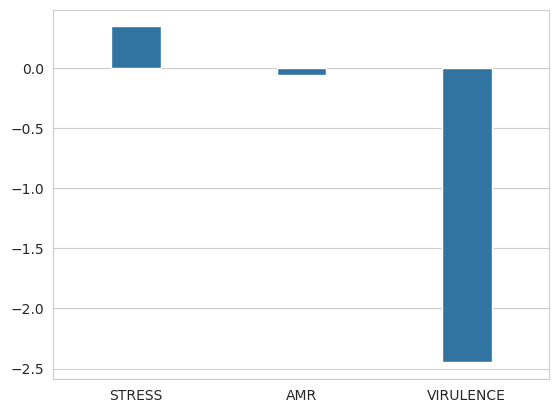

In [25]:
sns.barplot(x=ods_dict.keys(), y=ods_dict.values(), width=0.3)
plt.savefig("../figures/amr/amr_class_odds.pdf", bbox_inches="tight")

In [ ]:
df_map = pd.read_csv("../env_corr/taxon_countries.tsv", sep="\t")

df_map.head()

,taxon_oid,Ecosystem Subtype,Latitude,Longitude,Origin,Isolation Country,Ecosystem Subtype Custom,Plasmid Count,soil_class,bdod (cg/cm³),...,silt (g/kg),soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM
0,3300049023,Grasslands,38.53,-121.78,Meta,USA,Grasslands,36,Luvisols,152.0,...,562.0,335.0,POINT (-121.78 38.53),761.0,Great Central Valley,NaN,NA12,Nearctic,12.0,"Mediterranean Forests, Woodlands and Scrub"
1,3300012840,Grasslands,43.07,-89.40,Meta,USA,Grasslands,21,Luvisols,NaN,...,NaN,NaN,POINT (-89.4 43.07),187.0,Prairie-Forest Border,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
2,3300039503,Unclassified,63.88,-149.23,Meta,USA,Unclassified,3,Cambisols,60.0,...,496.0,2409.0,POINT (-149.23 63.88),734.0,Alaska Range,NaN,NA6,Nearctic,6.0,Boreal Forests/Taiga
3,3300042005,Rhizosphere,41.20,-97.94,Meta,USA,Rhizosphere,6,Kastanozems,135.0,...,242.0,301.0,POINT (-97.94 41.2),747.0,Central Mixed-Grass Prairie,NaN,NA8,Nearctic,8.0,"Temperate Grasslands, Savannas and Shrublands"
4,3300049265,Agricultural land,38.55,-121.87,Meta,USA,Agricultural land,1,Vertisols,158.0,...,508.0,274.0,POINT (-121.87 38.55),761.0,Great Central Valley,NaN,NA12,Nearctic,12.0,"Mediterranean Forests, Woodlands and Scrub"


In [27]:
df = df.join(
    df_map.drop("Origin", axis=1).set_index("taxon_oid"),
    on="taxon_oid",
).dropna(how="all")

In [ ]:
df[df["Protein identifier"].str.contains("IMGPR_plasmid_2744054556_000002")]

,Plasmid,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,...,silt (g/kg),soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM
436567,IMGPR_plasmid_2744054556_000002,IMGPR_plasmid_2744054556_000002|2744067052|274...,asr,acid resistance repetitive basic protein Asr,plus,STRESS,ACID,ACID,NaN,HMM,...,NaN,NaN,POINT EMPTY,NaN,Unknown,NaN,NaN,Unknown,NaN,Unknown
436665,IMGPR_plasmid_2744054556_000002,IMGPR_plasmid_2744054556_000002|2744067052|274...,blaLEN-16,class A beta-lactamase LEN-16,core,AMR,AMR,BETA-LACTAM,BETA-LACTAM,ALLELEP,...,NaN,NaN,POINT EMPTY,NaN,Unknown,NaN,NaN,Unknown,NaN,Unknown


In [29]:
ptus = pd.read_csv(
    "../ptu_derep/derep_plasmids_clusters_with_ptu_ids.tsv",
    sep="\t",
    header=None,
    index_col=0,
)
ptus_mapping = {}
for ptu in ptus.index:
    for plasmid in ptus.loc[ptu, 2].split(","):
        plasmid = plasmid.split("|")[0] if "IMGPR" in plasmid else plasmid
        ptus_mapping[plasmid] = ptu
df["PTU"] = df["Plasmid"].apply(lambda x: ptus_mapping.get(x, np.nan))
df = df.dropna(subset=["PTU"])

---
## Start analysis

In [30]:
df[["Class_custom", "Element type"]]

,Class_custom,Element type
0,ARSENIC,STRESS
784,ARSENIC,STRESS
882,MERCURY,STRESS
980,COPPER,STRESS
1702,COPPER,STRESS
...,...,...
679749,VIRULENCE,VIRULENCE
679754,VIRULENCE,VIRULENCE
679759,VIRULENCE,VIRULENCE
679764,BETA-LACTAM,AMR


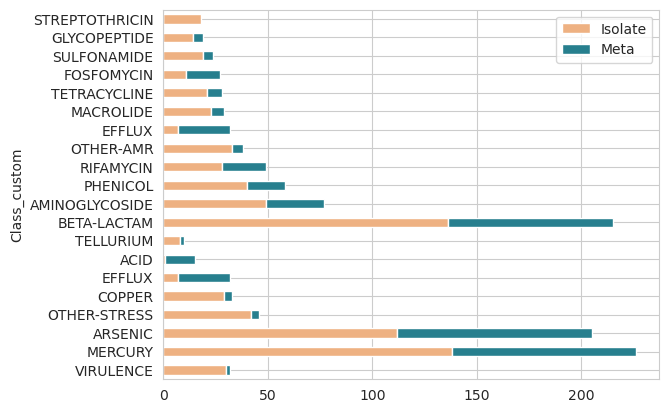

In [31]:
a = (
    df.drop_duplicates(subset=["PTU", "Origin", "Class"])
    .groupby("Class_custom")["Origin"]
    .value_counts()
    .unstack()
)
a["Total"] = a.sum(axis=1)

a = a.join(
    df[["Class_custom", "Element type"]].drop_duplicates().set_index("Class_custom")
)
a = a.sort_values(["Element type", "Total"], ascending=False).drop(
    ["Total", "Element type"], axis=1
)
a.plot(kind="barh", stacked=True, color=["#EEB182", "#277F8E"])
plt.savefig("../figures/amr/amr_ptu_count.pdf", bbox_inches="tight")

In [32]:
a

,Isolate,Meta
Class_custom,,
VIRULENCE,30.0,2.0
MERCURY,138.0,88.0
ARSENIC,112.0,93.0
OTHER-STRESS,42.0,4.0
COPPER,29.0,4.0
EFFLUX,7.0,25.0
ACID,1.0,14.0
TELLURIUM,8.0,2.0
BETA-LACTAM,136.0,79.0


In [30]:
df.head()

,Plasmid,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,...,silt (g/kg),soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM
0,2124908023|SwBS_Contig_18,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,...,414.0,486.0,POINT (-84.47 42.7),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
784,2209111021|2221179945,2209111021|2221179945_197,arsN2,arsenic resistance N-acetyltransferase ArsN2,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,...,401.0,991.0,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests
882,2209111021|2221179945,2209111021|2221179945_198,merB,organomercurial lyase MerB,plus,STRESS,METAL,MERCURY,ORGANOMERCURY,HMM,...,401.0,991.0,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests
980,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,copA,laccase-like oxidase CopA,plus,STRESS,METAL,COPPER,COPPER,BLASTP,...,512.0,352.0,POINT (-96.61 39.1),756.0,Osage Plains/Flint Hills Prairie,NaN,NA8,Nearctic,8.0,"Temperate Grasslands, Savannas and Shrublands"
1702,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,copB,copper-binding protein CopB,plus,STRESS,METAL,COPPER,COPPER,EXACTP,...,512.0,352.0,POINT (-96.61 39.1),756.0,Osage Plains/Flint Hills Prairie,NaN,NA8,Nearctic,8.0,"Temperate Grasslands, Savannas and Shrublands"


In [31]:
df.drop_duplicates(subset=["PTU", "Class"]).groupby("Element type")[
    "Origin"
].value_counts()

Element type  Origin 
AMR           Meta       215
              Isolate    192
STRESS        Meta       205
              Isolate    182
VIRULENCE     Isolate     19
              Meta         2
Name: count, dtype: int64

<Axes: ylabel='Element type'>

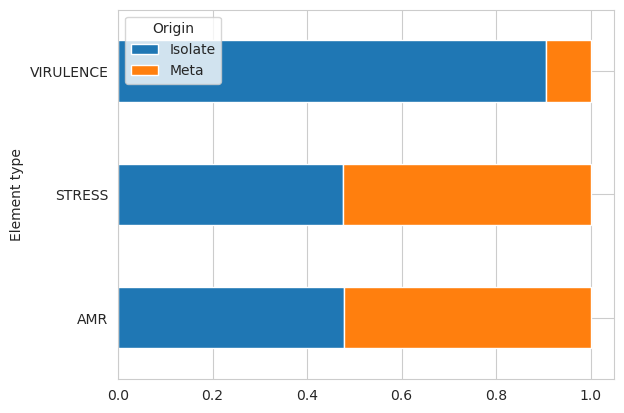

In [32]:
g = (
    df.drop_duplicates(subset=["PTU", "Origin", "Class"])
    .groupby("Element type")["Origin"]
    .value_counts()
    .unstack()
)

g.apply(lambda x: x / x.sum(), axis=1).plot(kind="barh", stacked=True)
# plt.savefig('../figures/element_type_origin_pie.pdf', bbox_inches='tight')

Do plasmids carry more than one resistance class?

In [33]:
b = (
    df.drop_duplicates(subset=["Plasmid", "Origin", "Class"])
    .groupby("Plasmid")["Class"]
    .value_counts()
    .unstack()
    .fillna(0)
)
b["Total"] = b.sum(axis=1)
b["Origin"] = b.index.map(df.drop_duplicates("Plasmid").set_index("Plasmid")["Origin"])
b["PTU"] = b.index.map(df.drop_duplicates("Plasmid").set_index("Plasmid")["PTU"])
b["Ecosystem Subtype Custom"] = b.index.map(
    df.drop_duplicates("Plasmid").set_index("Plasmid")["Ecosystem Subtype Custom"]
)

b[b["Total"] > 1].sort_values("Total", ascending=False)

Class,ACID,AMINOGLYCOSIDE,ARSENIC,BETA-LACTAM,BLEOMYCIN,CADMIUM,CADMIUM/LEAD/ZINC,COLISTIN,COPPER,COPPER/NICKEL,...,STREPTOTHRICIN,SULFONAMIDE,TELLURIUM,TETRACYCLINE,TRIMETHOPRIM,VIRULENCE,Total,Origin,PTU,Ecosystem Subtype Custom
Plasmid,,,,,,,,,,,,,,,,,,,,,
PLSDB_NZ_CP067067.1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,16.0,Isolate,PTU-12362,Unclassified
Refsoil_NZ_CP007558.1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,10.0,Isolate,PTU-02711,Unclassified
PLSDB_CP099719.1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,9.0,Isolate,PTU-04217,Unclassified
Refsoil_NC_011092.1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,8.0,Isolate,PTU-04802,Unclassified
Refsoil_NZ_CP004000.1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,8.0,Isolate,PTU-43314,Unclassified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300051851|Ga0506519_0000276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Meta,PTU-03355,Agricultural land
3300051238|Ga0506494_0000646,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Meta,PTU-03355,Agricultural land
3300050133|Ga0500025_000003,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Meta,PTU-00500,Peat


In [34]:
b[(b["Total"] > 1) & (b["Origin"] == "Meta")].drop_duplicates("PTU")[
    "Ecosystem Subtype Custom"
].value_counts()

Ecosystem Subtype Custom
Rhizosphere          9
Other                6
Agricultural land    4
Temperate forest     3
Grasslands           2
Unclassified         2
Name: count, dtype: int64

In [35]:
b[b["Total"] > 1].sort_values("Total", ascending=False)["PTU"].nunique()

87

In [36]:
b[(b["Total"] > 1)].sort_values("Total", ascending=False).drop_duplicates("PTU")[
    "Ecosystem Subtype Custom"
].value_counts()

Ecosystem Subtype Custom
Unclassified         58
Rhizosphere          10
Other                 8
Agricultural land     5
Grasslands            2
Temperate forest      2
Name: count, dtype: int64

What about different resistance types?

In [37]:
c[c["Total"] > 1].drop_duplicates("PTU")["Origin"].value_counts()

NameError: name 'c' is not defined

In [70]:
df[df["Plasmid"] == "3300025711|Ga0207696_1000042"]

,Plasmid,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,...,PTU Count,geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM,PTU
47371,3300025711|Ga0207696_1000042,3300025711|Ga0207696_1000042_14,oqxB,multidrug efflux RND transporter permease subu...,core,AMR,AMR,PHENICOL/QUINOLONE,PHENICOL/QUINOLONE,BLASTP,...,100.0,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-04120
47469,3300025711|Ga0207696_1000042,3300025711|Ga0207696_1000042_226,asr,acid resistance repetitive basic protein Asr,plus,STRESS,ACID,ACID,NaN,HMM,...,100.0,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-04120


In [57]:
c = (
    df.drop_duplicates(subset=["Plasmid", "Origin", "Element type"])
    .groupby("Plasmid")["Element type"]
    .value_counts()
    .unstack()
    .fillna(0)
)
c["Total"] = c.sum(axis=1)
c["Origin"] = c.index.map(df.drop_duplicates("Plasmid").set_index("Plasmid")["Origin"])
c["PTU"] = c.index.map(df.drop_duplicates("Plasmid").set_index("Plasmid")["PTU"])
c["Ecosystem Subtype Custom"] = c.index.map(
    df.drop_duplicates("Plasmid").set_index("Plasmid")["Ecosystem Subtype Custom"]
)
c[c["Total"] > 1].sort_values("Total", ascending=False)

Element type,AMR,STRESS,VIRULENCE,Total,Origin,PTU,Ecosystem Subtype Custom
Plasmid,,,,,,,
PLSDB_NZ_CP041619.1,1.0,1.0,1.0,3.0,Isolate,PTU-44444,Unclassified
3300025711|Ga0207696_1000042,1.0,1.0,0.0,2.0,Meta,PTU-04120,Rhizosphere
Refsoil_NC_014172.1,1.0,1.0,0.0,2.0,Isolate,PTU-12507,Unclassified
PLSDB_NZ_CP118267.1,1.0,1.0,0.0,2.0,Isolate,PTU-01272,NaN
Refsoil_NC_006625.1,0.0,1.0,1.0,2.0,Isolate,PTU-12577,Unclassified
Refsoil_NC_006856.1,1.0,1.0,0.0,2.0,Isolate,PTU-44514,Unclassified
Refsoil_NC_009140.1,1.0,1.0,0.0,2.0,Isolate,PTU-02711,Unclassified
Refsoil_NC_009650.1,1.0,1.0,0.0,2.0,Isolate,PTU-43484,Unclassified
Refsoil_NC_009651.1,1.0,1.0,0.0,2.0,Isolate,PTU-43483,Unclassified


In [52]:
c[c["Total"] > 1].sort_values("Total", ascending=False).shape

(41, 6)

In [53]:
c[c["Total"] > 1].sort_values("Total", ascending=False)["PTU"].nunique()

35

In [ ]:
df.drop_duplicates(subset=["Plasmid", "Element type", "PTU"]).groupby("Element type")[
    "Origin"
].value_counts()

KeyError: Index(['PTU'], dtype='object')

In [40]:
df[df["Plasmid"] == "PLSDB_NZ_CP067067.1"].drop_duplicates(
    subset=["Plasmid", "Origin", "Class"]
)

,Plasmid,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,...,PTU Count,geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM,PTU
190279,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_136,aac(6')-IIc,aminoglycoside N-acetyltransferase AAC(6')-IIc,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN/KANAMYCIN/TOBRAMYCIN,EXACTP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362
190347,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_140,arr,NAD(+)--rifampin ADP-ribosyltransferase,core,AMR,AMR,RIFAMYCIN,RIFAMYCIN,EXACTP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362
190381,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_141,ere(A),EreA family erythromycin esterase,core,AMR,AMR,MACROLIDE,ERYTHROMYCIN,PARTIALP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362
190415,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_142,qacE,quaternary ammonium compound efflux SMR transp...,core,STRESS,BIOCIDE,QUATERNARY AMMONIUM,QUATERNARY AMMONIUM,EXACTP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362
190449,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_143,sul1,sulfonamide-resistant dihydropteroate synthase...,core,AMR,AMR,SULFONAMIDE,SULFONAMIDE,EXACTP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362
190483,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_153,qnrB,quinolone resistance pentapeptide repeat prote...,core,AMR,AMR,QUINOLONE,QUINOLONE,EXACTP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362
190517,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_16,terW,tellurium resistance protein TerW,plus,STRESS,METAL,TELLURIUM,TELLURIUM,EXACTP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362
190551,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_160,blaDHA,extended-spectrum class C beta-lactamase DHA-1,core,AMR,AMR,BETA-LACTAM,CEPHALOSPORIN,EXACTP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362
190619,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_177,catA2,type A-2 chloramphenicol O-acetyltransferase C...,core,AMR,AMR,PHENICOL,CHLORAMPHENICOL,EXACTP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362
190653,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_180,tet(D),tetracycline efflux MFS transporter Tet(D),core,AMR,AMR,TETRACYCLINE,TETRACYCLINE,EXACTP,...,1.0,POINT (112.97 28.2),541.0,Changjiang Plain Evergreen Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests,PTU-12362


Correlation between soil properties and any resistance?

In [26]:
df_corr = df[
    [
        "Class",
        "bdod (cg/cm³)",
        "cec (mmol(c)/kg)",
        "cfvo (cm³/dm³)",
        "clay (g/kg)",
        "nitrogen (cg/kg)",
        "ocd (dg/dm³)",
        "phh2o (pH*10)",
        "sand (g/kg)",
        "silt (g/kg)",
        "soc (dg/kg)",
    ]
]

In [27]:
a = df_corr.drop_duplicates().melt(id_vars="Class")

# make class dummy

In [29]:
(
    pd.get_dummies(a["Class"], dtype=int)
    .join(df_corr)
    .corr(numeric_only=True)
    .iloc[:35, 35:]
).dropna()

,bdod (cg/cm³),cec (mmol(c)/kg),cfvo (cm³/dm³),clay (g/kg),nitrogen (cg/kg),ocd (dg/dm³),phh2o (pH*10),sand (g/kg),silt (g/kg),soc (dg/kg)
ARSENIC,0.254982,-0.158114,-0.263129,-0.121168,0.239127,-0.286618,0.097129,0.062701,0.028632,-0.205691
MERCURY,0.309798,-0.400000,-0.298698,0.420130,-0.329407,-0.261839,0.430007,-0.440125,0.445745,-0.363739
METAL,-0.632327,0.600000,0.631534,-0.266864,0.026933,0.624386,-0.552866,0.360813,-0.481961,0.623920


In [40]:
# df_corr = (
#     pd.get_dummies(a["Class"], dtype=int)
#     .join(df_corr)
#     .corr(numeric_only=True)
#     .iloc[:35, 35:].dropna()
# )

In [31]:
df_corr = pd.get_dummies(a["Class"], dtype=int).join(df_corr)

In [41]:
from scipy.stats import pearsonr

df_corr_p = df_corr.corr(
    numeric_only=True, method=lambda x, y: stats.pearsonr(x, y)[1]
).iloc[:35, 35:]

df_corr_g = df_corr.corr(
    method=lambda x, y: stats.pearsonr(x, y)[0], numeric_only=True
).iloc[:35, 35:]

/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/geo/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [44]:
df_corr_p.dropna()

,bdod (cg/cm³),cec (mmol(c)/kg),cfvo (cm³/dm³),clay (g/kg),nitrogen (cg/kg),ocd (dg/dm³),phh2o (pH*10),sand (g/kg),silt (g/kg),soc (dg/kg)
ARSENIC,0.625816,0.764806,0.614415,0.819138,0.648146,0.581845,0.854765,0.906071,0.957064,0.695814
MERCURY,0.550169,0.432000,0.565278,0.406883,0.523761,0.616217,0.394745,0.382441,0.375665,0.478455
METAL,0.177923,0.208000,0.178638,0.609207,0.959611,0.185132,0.255196,0.482267,0.333034,0.185559


In [45]:
df_corr_g.dropna()

,bdod (cg/cm³),cec (mmol(c)/kg),cfvo (cm³/dm³),clay (g/kg),nitrogen (cg/kg),ocd (dg/dm³),phh2o (pH*10),sand (g/kg),silt (g/kg),soc (dg/kg)
ARSENIC,0.254982,-0.158114,-0.263129,-0.121168,0.239127,-0.286618,0.097129,0.062701,0.028632,-0.205691
MERCURY,0.309798,-0.400000,-0.298698,0.420130,-0.329407,-0.261839,0.430007,-0.440125,0.445745,-0.363739
METAL,-0.632327,0.600000,0.631534,-0.266864,0.026933,0.624386,-0.552866,0.360813,-0.481961,0.623920


<Axes: >

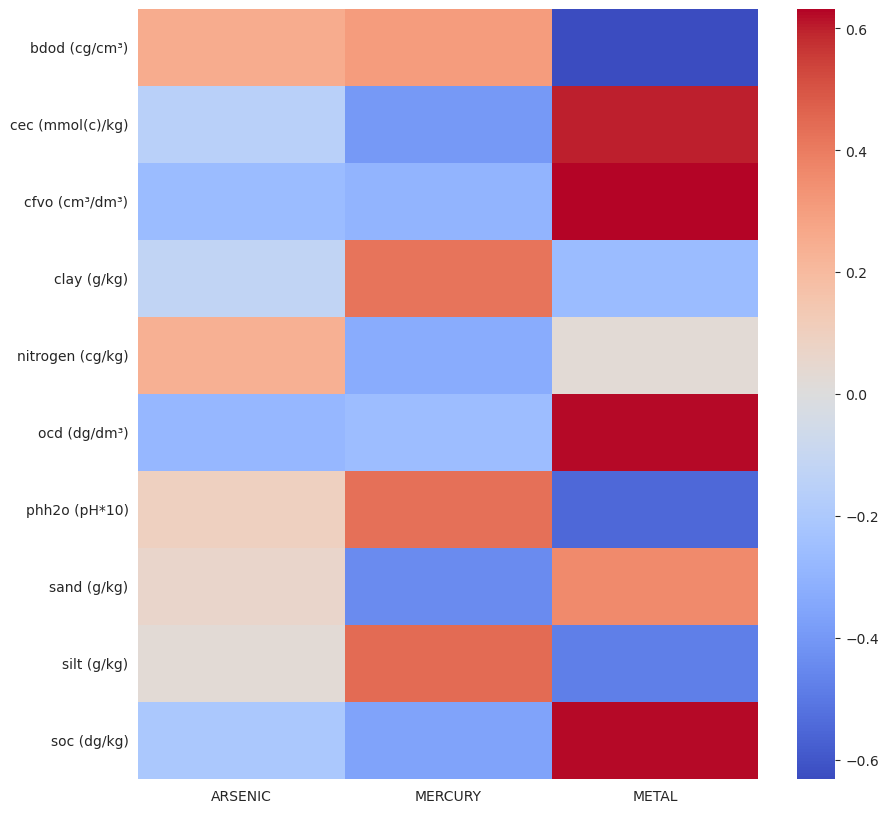

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr_g.dropna().T, cmap="coolwarm", center=0, ax=ax)

In [26]:
df.head()

,Plasmid,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,...,o__,f__,g__,s__,new_o__,Ecosystem Subtype,Ecosystem Subtype Custom,Latitude,Longitude,PTU
0,2124908023|SwBS_Contig_18,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,...,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas_E,s__Pseudomonas_E frederiksbergensis_A,o__Pseudomonadales,Agricultural land,Agricultural land,42.7,-84.47,PTU-06617
785,2209111021|2221179945,2209111021|2221179945_197,arsN2,arsenic resistance N-acetyltransferase ArsN2,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,...,o__Burkholderiales,f__Burkholderiaceae,g__Caballeronia,s__Caballeronia sordidicola_A,o__Burkholderiales,Grasslands,Grasslands,51.8,-0.37,PTU-06638
883,2209111021|2221179945,2209111021|2221179945_198,merB,organomercurial lyase MerB,plus,STRESS,METAL,MERCURY,ORGANOMERCURY,HMM,...,o__Burkholderiales,f__Burkholderiaceae,g__Caballeronia,s__Caballeronia sordidicola_A,o__Burkholderiales,Grasslands,Grasslands,51.8,-0.37,PTU-06638
981,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,copA,laccase-like oxidase CopA,plus,STRESS,METAL,COPPER,COPPER,BLASTP,...,o__Xanthomonadales,f__Xanthomonadaceae,g__Stenotrophomonas,s__Stenotrophomonas maltophilia_AJ,Other,Loam,Other,39.1,-96.61,PTU-09880
1703,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,copB,copper-binding protein CopB,plus,STRESS,METAL,COPPER,COPPER,EXACTP,...,o__Xanthomonadales,f__Xanthomonadaceae,g__Stenotrophomonas,s__Stenotrophomonas maltophilia_AJ,Other,Loam,Other,39.1,-96.61,PTU-09880


In [24]:
df.drop_duplicates("PTU").shape[0]

577

In [25]:
df[(df["MOB"] > 0) | (df["CONJ"] > 0)].drop_duplicates("PTU").shape[0]

232

Acid only in metaG?

This acid protein is described in Enterobacteriaceae in general. And is induced at low pH (starting at 4.5)

In [29]:
df[df["Class_custom"] == "ACID"].drop_duplicates(subset="PTU")["f__"].unique()

array(['f__Enterobacteriaceae', nan], dtype=object)

Let's try and check if any class is 'enriched' in meta

In [30]:
enrichment = (
    df.drop_duplicates(subset=["PTU", "Origin", "Gene symbol"])
    .groupby("Class_custom")["Origin"]
    .value_counts()
    .unstack()
    .fillna(0.00001)
)
enrichment["Meta_fraction"] = (
    enrichment["Meta"] / df[df["Origin"] == "Meta"]["PTU"].nunique()
)
enrichment["Isolate_fraction"] = (
    enrichment["Isolate"] / df[df["Origin"] == "Isolate"]["PTU"].nunique()
)
enrichment["Enrichment"] = np.log10(
    enrichment["Meta_fraction"] / enrichment["Isolate_fraction"]
)
enrichment["Enrichment"] = (
    enrichment["Enrichment"].replace(np.inf, 3).replace(-np.inf, -3)
)
enrichment["Origin"] = enrichment["Enrichment"].apply(
    lambda x: "Meta" if x > 0 else "Isolate"
)
enrichment.head()

Origin,Isolate,Meta,Meta_fraction,Isolate_fraction,Enrichment,Origin
Class_custom,,,,,,
ACID,0.00001,14.0,0.038043,4.629630e-08,5.914734,Meta
AMINOGLYCOSIDE,75.00000,30.0,0.081522,3.472222e-01,-0.629334,Isolate
ARSENIC,76.00000,119.0,0.323370,3.518519e-01,-0.036661,Isolate
BETA-LACTAM,57.00000,81.0,0.220109,2.638889e-01,-0.078784,Isolate
COPPER,112.00000,15.0,0.040761,5.185185e-01,-1.104521,Isolate


/tmp/ipykernel_3245672/871394503.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([i.get_text().capitalize() for i in ax.get_yticklabels()])


Text(0, 0.5, '')

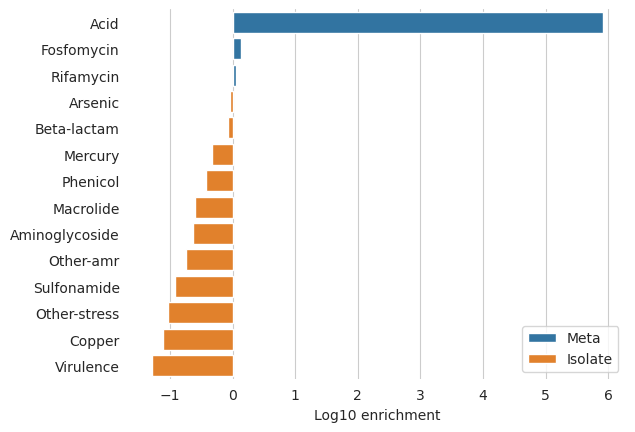

In [31]:
fig, ax = plt.subplots()
sns.barplot(
    data=enrichment.reset_index().sort_values(by="Enrichment", ascending=False),
    y="Class_custom",
    x="Enrichment",
    hue="Origin",
    ax=ax,
)
# legend location bottom right)
plt.legend(loc="lower right")
sns.despine(left=True, bottom=True)
ax.set_xlabel("Log10 enrichment")
ax.set_yticklabels([i.get_text().capitalize() for i in ax.get_yticklabels()])
ax.set_ylabel("")

# fig.savefig("../figures/amr_class_enrichment.pdf", bbox_inches="tight")

In [32]:
# Hypergeometric test
# Define your parameters
def calc_hypergeom(resistance_class):
    M = df["PTU"].nunique()  # Total number of PTUs
    n = df[df["Class_custom"] == resistance_class][
        "PTU"
    ].nunique()  # Total PTUs with the ARG
    N = df[df["Origin"] == "Meta"][
        "PTU"
    ].nunique()  # Total number of PTUs in metagenomes
    x = df[(df["Origin"] == "Meta") & (df["Class_custom"] == resistance_class)][
        "PTU"
    ].nunique()  # Number of PTUs with the ARG in metagenomes
    # Calculate the p-value
    p_value = stats.hypergeom.sf(x - 1, M, n, N)

    print(f"The p-value for {resistance_class} is: {p_value}")


calc_hypergeom("ACID")
calc_hypergeom("FOSFOMYCIN")

The p-value for ACID is: 0.0016815541790967585
The p-value for FOSFOMYCIN is: 0.3631526185934395


#### Acid
Acid only in metaG?
This acid protein is described in Enterobacteriaceae in general. And is induced at low pH (starting at 4.5)

#### Fosfomycin
Beta-lactam antibiotics represent one of the most widely used antibiotic classes [6,7]. These antibiotics are known to inhibit cell wall formation and resistance can occur through multiple molecular mechanisms, including the synthesis of efflux pumps, alteration of the molecular target and production of beta-lactamases [8,9]. For instance, the clinically relevant extended spectrum beta-lactamase coding gene shv has been detected in soil [10].

Apart from beta-lactam antibiotics, fosfomycin, which represents the so far only available epoxide antibiotic, also inhibits cell wall formation [11,12]. Notably, fosfomycin belongs to the so-called last resort antibiotics, which often represent the only treatment option when other drugs fail to efficiently fight infections [13]. Resistance toward this antimicrobial compound can arise via amino acid substitutions within the active site of the target enzyme UDP-N-acetylglucosamine enolpyruvyl transferase (MurA), reduced uptake, or production of fosfomycin-modifying enzymes [11,14]. So far, fosfomycin resistance was rarely considered in surveys focusing on soil resistomes. Nevertheless, genes encoding fosfomycin-modifying enzymes such as fosK [15] have already been detected in soil and a fosfomycin-resistant MurA variant has been identified based on soil metagenomic library screening 

Transferrable plasmids with resistances

In [43]:
transf_res = df[(df["MOB"] > 0) | (df["CONJ"] > 0) | (df["dCONJ"] > 1)]

print(
    f'Out of the {df["Plasmid"].nunique()} plasmids ({df["PTU"].nunique()} PTUs) with resistance genes, there are {transf_res["Plasmid"].nunique()} transferrable plasmids with resistance genes ({transf_res['PTU'].nunique()} PTUs). {transf_res[transf_res['Origin']=="Meta"]['Plasmid'].nunique()} plasmids ({transf_res[transf_res['Origin']=="Meta"]['PTU'].nunique()} PTUs) are from meta and {transf_res[transf_res['Origin']=="Isolate"]['Plasmid'].nunique()} ({transf_res[transf_res['Origin']=="Isolate"]['PTU'].nunique()} PTUs) are from isolates'
)

Out of the 1171 plasmids (643 PTUs) with resistance genes, there are 344 transferrable plasmids with resistance genes (247 PTUs). 165 plasmids (120 PTUs) are from meta and 179 (131 PTUs) are from isolates


In [44]:
transf_res[transf_res["Class_custom"] == "FOSFOMYCIN"][
    "Ecosystem Subtype Custom"
].value_counts()

Ecosystem Subtype Custom
Unclassified         5
Agricultural land    3
Rhizosphere          2
Temperate forest     2
Tropical forest      1
Name: count, dtype: int64

In [31]:
df[df["Plasmid"] == "PLSDB_NZ_CP067067.1"]

,Plasmid,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,...,c__,o__,f__,g__,s__,Ecosystem Subtype,Ecosystem Subtype Custom,Latitude,Longitude,PTU
12931,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_136,aac(6')-IIc,aminoglycoside N-acetyltransferase AAC(6')-IIc,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN/KANAMYCIN/TOBRAMYCIN,EXACTP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026
12965,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_139,aac(3)-IIg,aminoglycoside N-acetyltransferase AAC(3)-IIg,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN,EXACTP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026
12999,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_140,arr,NAD(+)--rifampin ADP-ribosyltransferase,core,AMR,AMR,RIFAMYCIN,RIFAMYCIN,EXACTP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026
13033,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_141,ere(A),EreA family erythromycin esterase,core,AMR,AMR,MACROLIDE,ERYTHROMYCIN,PARTIALP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026
13067,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_142,qacE,quaternary ammonium compound efflux SMR transp...,core,STRESS,BIOCIDE,QUATERNARY AMMONIUM,QUATERNARY AMMONIUM,EXACTP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026
13101,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_143,sul1,sulfonamide-resistant dihydropteroate synthase...,core,AMR,AMR,SULFONAMIDE,SULFONAMIDE,EXACTP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026
13135,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_153,qnrB,quinolone resistance pentapeptide repeat prote...,core,AMR,AMR,QUINOLONE,QUINOLONE,EXACTP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026
13169,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_16,terW,tellurium resistance protein TerW,plus,STRESS,METAL,TELLURIUM,TELLURIUM,EXACTP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026
13203,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_160,blaDHA,extended-spectrum class C beta-lactamase DHA-1,core,AMR,AMR,BETA-LACTAM,CEPHALOSPORIN,EXACTP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026
13237,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_164,sul1,sulfonamide-resistant dihydropteroate synthase...,core,AMR,AMR,SULFONAMIDE,SULFONAMIDE,PARTIALP,...,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026


In [32]:
df.groupby("Plasmid").size()

Plasmid
2124908023|SwBS_Contig_18                             1
2162886007|SwRhRL2b_contig_1975805                    3
2209111021|2221179945                                 2
3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_1000003    2
3300000564|RepKanNP_BrdU_F12BDRAFT_1000001            8
                                                     ..
Refsoil_NZ_CP007795.1                                 1
Refsoil_NZ_CP007796.1                                 1
Refsoil_NZ_CP008958.1                                 5
Refsoil_NZ_HG916855.1                                 1
Refsoil_NZ_HG938354.1                                 1
Length: 1171, dtype: int64

In [33]:
data = pd.DataFrame(df.groupby("Plasmid").size())
data = data.rename(columns={0: "Num_resistance"})
df = df.join(data, on="Plasmid")

We need to fix the number of resistance genes. Because if there is many parts, they will show as many, but in reality it will be only one

In [34]:
# somehow iterate over protein identifier, see if they are part of the same gene complex
fix_res = {}
for idx, row in df.iterrows():
    if row["Plasmid"] not in fix_res:
        fix_res[row["Plasmid"]] = set()
    fix_res[row["Plasmid"]].add(row["Class_custom"])


unique_values = set()
for key in fix_res:
    unique_values.update(fix_res[key])

# Sort the unique values for consistent column order
sorted_unique_values = sorted(unique_values)

# Create an empty DataFrame with these unique values as columns
df_res_fixed = pd.DataFrame(columns=sorted_unique_values, index=fix_res.keys()).fillna(
    False
)

# Populate the DataFrame
for key, values in fix_res.items():
    for value in values:
        df_res_fixed.at[key, value] = True

df_res_fixed.head()

,ACID,AMINOGLYCOSIDE,ARSENIC,BETA-LACTAM,COPPER,FOSFOMYCIN,GLYCOPEPTIDE,MACROLIDE,MERCURY,OTHER-AMR,OTHER-STRESS,PHENICOL,RIFAMYCIN,SILVER,STREPTOTHRICIN,SULFONAMIDE,TELLURIUM,TETRACYCLINE,VIRULENCE
2124908023|SwBS_Contig_18,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2162886007|SwRhRL2b_contig_1975805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2209111021|2221179945,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_1000003,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3300000564|RepKanNP_BrdU_F12BDRAFT_1000001,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [35]:
df_res_fixed = df_res_fixed.join(
    df[
        [
            "Plasmid",
            "Origin",
            "Ecosystem Subtype Custom",
            "Latitude",
            "Longitude",
            "f__",
        ]
    ]
    .drop_duplicates()
    .set_index("Plasmid")
)
df_res_fixed.head()

,ACID,AMINOGLYCOSIDE,ARSENIC,BETA-LACTAM,COPPER,FOSFOMYCIN,GLYCOPEPTIDE,MACROLIDE,MERCURY,OTHER-AMR,...,STREPTOTHRICIN,SULFONAMIDE,TELLURIUM,TETRACYCLINE,VIRULENCE,Origin,Ecosystem Subtype Custom,Latitude,Longitude,f__
2124908023|SwBS_Contig_18,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,Meta,Agricultural land,42.70,-84.47,f__Pseudomonadaceae
2162886007|SwRhRL2b_contig_1975805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,Meta,Rhizosphere,42.79,-84.39,f__Enterobacteriaceae
2209111021|2221179945,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,Meta,Grasslands,51.80,-0.37,f__Burkholderiaceae
3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_1000003,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,Meta,Other,39.10,-96.61,f__Xanthomonadaceae
3300000564|RepKanNP_BrdU_F12BDRAFT_1000001,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,Meta,Other,39.10,-96.61,f__Xanthomonadaceae


<Axes: ylabel='count'>

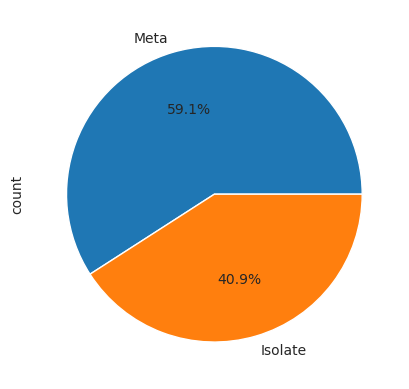

In [36]:
fig, ax = plt.subplots()
df.drop_duplicates(subset=["PTU", "Origin"])["Origin"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", ax=ax
)

# fig.savefig("../figures/ptu_with_amr_origin_pie.svg", bbox_inches="tight")

In [37]:
df["Num_res_kb"] = df["Num_resistance"] / (df["length"] / 1000)
df.head()

,Plasmid,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,...,f__,g__,s__,Ecosystem Subtype,Ecosystem Subtype Custom,Latitude,Longitude,PTU,Num_resistance,Num_res_kb
0,2124908023|SwBS_Contig_18,2124908023|SwBS_Contig_18_17,arsN1,arsinothricin resistance N-acetyltransferase A...,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,...,f__Pseudomonadaceae,g__Pseudomonas_E,None,Agricultural land,Agricultural land,42.70,-84.47,PTU-06219,1,0.042477
2,2162886007|SwRhRL2b_contig_1975805,2162886007|SwRhRL2b_contig_1975805_26,iroB,salmochelin biosynthesis C-glycosyltransferase...,plus,VIRULENCE,VIRULENCE,VIRULENCE,NaN,BLASTP,...,f__Enterobacteriaceae,g__Citrobacter,None,Rhizosphere,Rhizosphere,42.79,-84.39,PTU-02431,3,0.094694
5,2162886007|SwRhRL2b_contig_1975805,2162886007|SwRhRL2b_contig_1975805_27,iroC,salmochelin/enterobactin export ABC transporte...,plus,VIRULENCE,VIRULENCE,VIRULENCE,NaN,BLASTP,...,f__Enterobacteriaceae,g__Citrobacter,None,Rhizosphere,Rhizosphere,42.79,-84.39,PTU-02431,3,0.094694
8,2162886007|SwRhRL2b_contig_1975805,2162886007|SwRhRL2b_contig_1975805_30,iroN,siderophore salmochelin receptor IroN,plus,VIRULENCE,VIRULENCE,VIRULENCE,NaN,BLASTP,...,f__Enterobacteriaceae,g__Citrobacter,None,Rhizosphere,Rhizosphere,42.79,-84.39,PTU-02431,3,0.094694
11,2209111021|2221179945,2209111021|2221179945_197,arsN2,arsenic resistance N-acetyltransferase ArsN2,plus,STRESS,METAL,ARSENIC,ARSENIC,HMM,...,f__Burkholderiaceae,g__Caballeronia,None,Grasslands,Grasslands,51.80,-0.37,PTU-02806,2,0.011869


In [38]:
# # warmplot of plasmids <= 200kb


# sns.swarmplot(
#     data=df[df["length"] <= 200_000], x="Num_resistance", y="length", size=2
# ).set_title("Number of resistance genes vs plasmid length (plasmids <= 200kb)")

In [39]:
df[df["Plasmid"] == "PLSDB_NZ_CP067067.1"]

,Plasmid,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,...,f__,g__,s__,Ecosystem Subtype,Ecosystem Subtype Custom,Latitude,Longitude,PTU,Num_resistance,Num_res_kb
12931,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_136,aac(6')-IIc,aminoglycoside N-acetyltransferase AAC(6')-IIc,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN/KANAMYCIN/TOBRAMYCIN,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
12965,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_139,aac(3)-IIg,aminoglycoside N-acetyltransferase AAC(3)-IIg,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
12999,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_140,arr,NAD(+)--rifampin ADP-ribosyltransferase,core,AMR,AMR,RIFAMYCIN,RIFAMYCIN,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13033,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_141,ere(A),EreA family erythromycin esterase,core,AMR,AMR,MACROLIDE,ERYTHROMYCIN,PARTIALP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13067,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_142,qacE,quaternary ammonium compound efflux SMR transp...,core,STRESS,BIOCIDE,QUATERNARY AMMONIUM,QUATERNARY AMMONIUM,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13101,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_143,sul1,sulfonamide-resistant dihydropteroate synthase...,core,AMR,AMR,SULFONAMIDE,SULFONAMIDE,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13135,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_153,qnrB,quinolone resistance pentapeptide repeat prote...,core,AMR,AMR,QUINOLONE,QUINOLONE,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13169,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_16,terW,tellurium resistance protein TerW,plus,STRESS,METAL,TELLURIUM,TELLURIUM,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13203,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_160,blaDHA,extended-spectrum class C beta-lactamase DHA-1,core,AMR,AMR,BETA-LACTAM,CEPHALOSPORIN,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13237,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_164,sul1,sulfonamide-resistant dihydropteroate synthase...,core,AMR,AMR,SULFONAMIDE,SULFONAMIDE,PARTIALP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539


In [40]:
df[df["Num_resistance"] == df["Num_resistance"].max()]

,Plasmid,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,...,f__,g__,s__,Ecosystem Subtype,Ecosystem Subtype Custom,Latitude,Longitude,PTU,Num_resistance,Num_res_kb
12931,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_136,aac(6')-IIc,aminoglycoside N-acetyltransferase AAC(6')-IIc,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN/KANAMYCIN/TOBRAMYCIN,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
12965,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_139,aac(3)-IIg,aminoglycoside N-acetyltransferase AAC(3)-IIg,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
12999,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_140,arr,NAD(+)--rifampin ADP-ribosyltransferase,core,AMR,AMR,RIFAMYCIN,RIFAMYCIN,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13033,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_141,ere(A),EreA family erythromycin esterase,core,AMR,AMR,MACROLIDE,ERYTHROMYCIN,PARTIALP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13067,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_142,qacE,quaternary ammonium compound efflux SMR transp...,core,STRESS,BIOCIDE,QUATERNARY AMMONIUM,QUATERNARY AMMONIUM,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13101,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_143,sul1,sulfonamide-resistant dihydropteroate synthase...,core,AMR,AMR,SULFONAMIDE,SULFONAMIDE,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13135,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_153,qnrB,quinolone resistance pentapeptide repeat prote...,core,AMR,AMR,QUINOLONE,QUINOLONE,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13169,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_16,terW,tellurium resistance protein TerW,plus,STRESS,METAL,TELLURIUM,TELLURIUM,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13203,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_160,blaDHA,extended-spectrum class C beta-lactamase DHA-1,core,AMR,AMR,BETA-LACTAM,CEPHALOSPORIN,EXACTP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539
13237,PLSDB_NZ_CP067067.1,PLSDB_NZ_CP067067.1_164,sul1,sulfonamide-resistant dihydropteroate synthase...,core,AMR,AMR,SULFONAMIDE,SULFONAMIDE,PARTIALP,...,f__Enterobacteriaceae,g__Klebsiella,s__Klebsiella ornithinolytica,Unclassified,Unclassified,28.2,112.97,PTU-04026,34,0.103539


In [41]:
df["length_kb"] = df["length"] / 1000

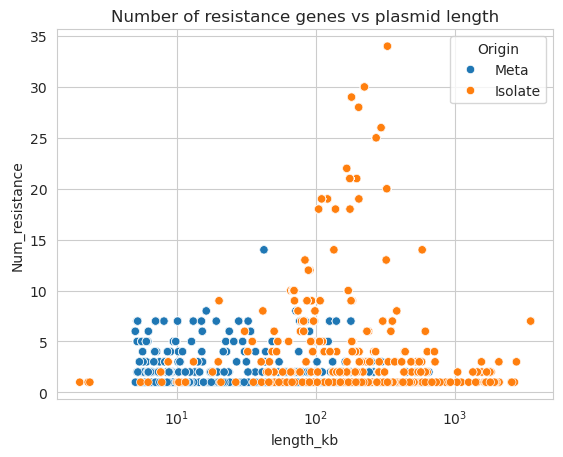

In [42]:
# warmplot of plasmids <= 200kb


sns.scatterplot(data=df, y="Num_resistance", x="length_kb", hue="Origin").set_title(
    "Number of resistance genes vs plasmid length"
)
plt.xscale("log")

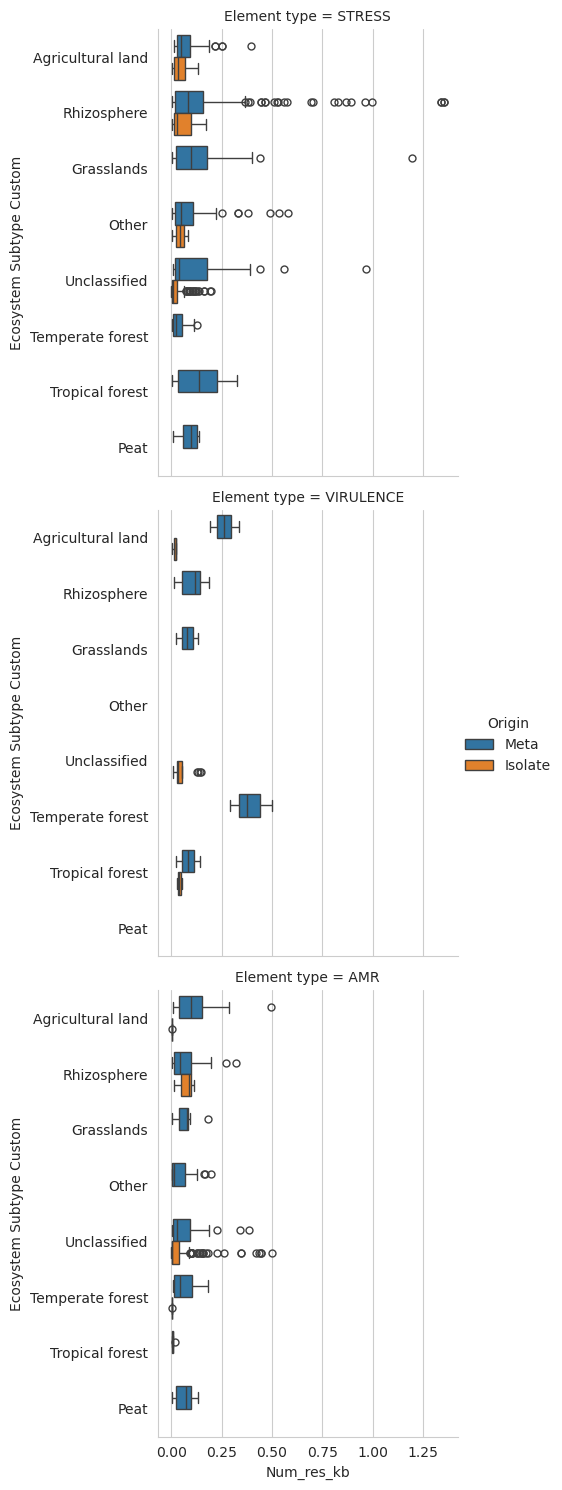

In [44]:
# fig, ax = plt.subplots()
# sns.swarmplot(
#     data=df.drop_duplicates(subset=["Plasmid"]),
#     y="Ecosystem Subtype Custom",
#     x="Num_res_kb",
#     ax=ax,
#     size=1.5,
#     color="black",
#     alpha=0.5,
# )
sns.catplot(
    data=df.drop_duplicates(subset=["Plasmid"]),
    y="Ecosystem Subtype Custom",
    x="Num_res_kb",
    hue="Origin",
    row="Element type",
    kind="box",
)


sns.despine()

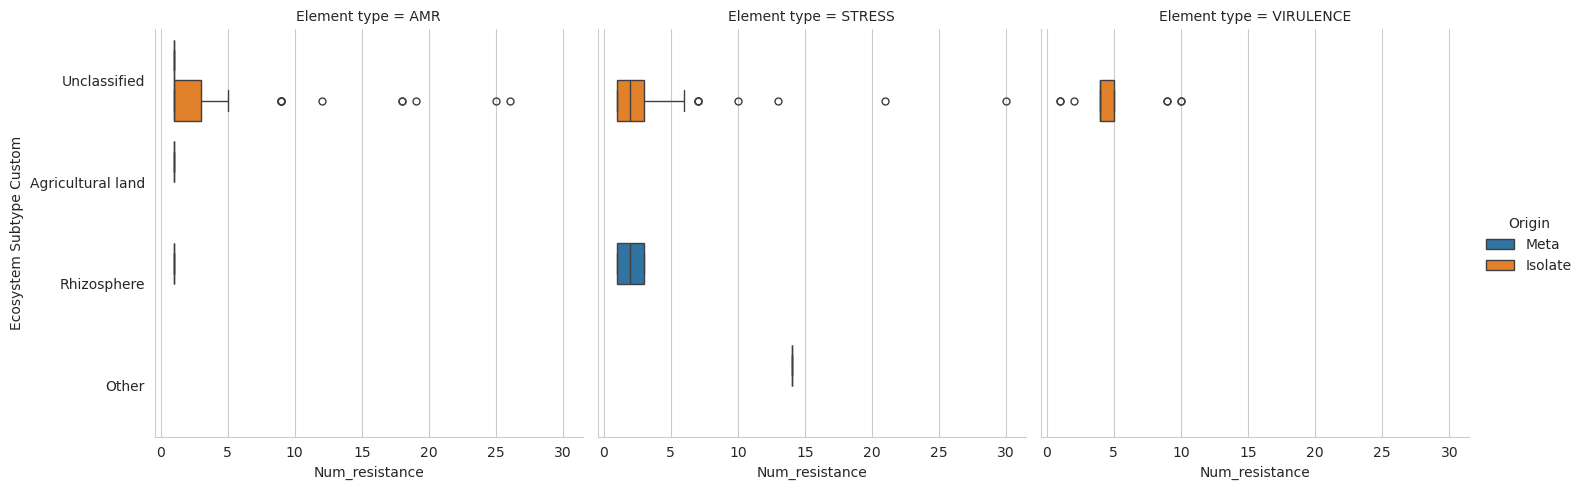

In [42]:
# fig, ax = plt.subplots()
# sns.swarmplot(
#     data=df.drop_duplicates(subset=["Plasmid"]),
#     y="Ecosystem Subtype Custom",
#     x="Num_res_kb",
#     ax=ax,
#     size=1.5,
#     color="black",
#     alpha=0.5,
# )
sns.catplot(
    data=df[df["Complete"] == True].drop_duplicates(subset=["Plasmid"]),
    y="Ecosystem Subtype Custom",
    x="Num_resistance",
    hue="Origin",
    col="Element type",
    kind="box",
)


sns.despine()

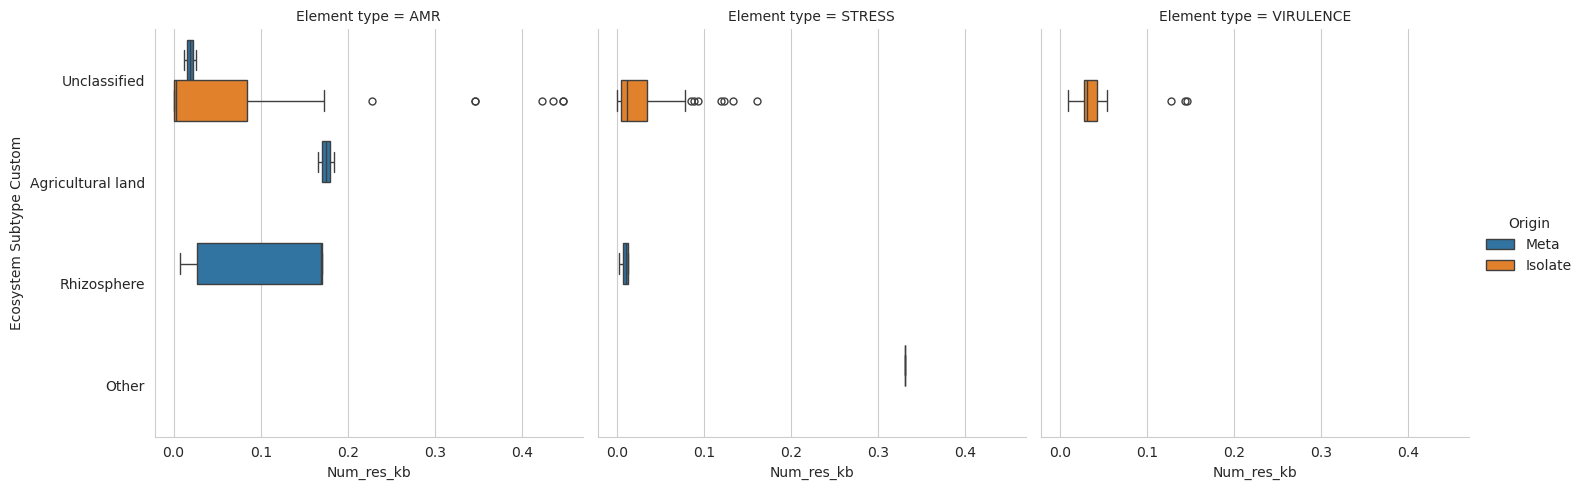

In [65]:
# fig, ax = plt.subplots()
# sns.swarmplot(
#     data=df.drop_duplicates(subset=["Plasmid"]),
#     y="Ecosystem Subtype Custom",
#     x="Num_res_kb",
#     ax=ax,
#     size=1.5,
#     color="black",
#     alpha=0.5,
# )
sns.catplot(
    data=df[df["Complete"] == True].drop_duplicates(subset=["Plasmid"]),
    y="Ecosystem Subtype Custom",
    x="Num_res_kb",
    hue="Origin",
    col="Element type",
    kind="box",
)


sns.despine()

In [63]:
# statistically compare the number of resistance genes per kb between meta and isolate plasmids in each environment environment
pval_dicts = {}
for env in df["Ecosystem Subtype Custom"].unique():
    try:
        meta = df[
            (df["Origin"] == "Meta")
            & (df["Element type"] == "AMR")
            & (df["Ecosystem Subtype Custom"] == env)
        ]["Num_res_kb"]
        isolate = df[
            (df["Origin"] == "Isolate")
            & (df["Element type"] == "AMR")
            & (df["Ecosystem Subtype Custom"] == env)
        ]["Num_res_kb"]
        pval_dicts[env] = stats.mannwhitneyu(
            meta, isolate, alternative="greater"
        ).pvalue
    except ValueError:
        pass
correction = stats.false_discovery_control(list(pval_dicts.values()))
for idx, corrected_p in enumerate(correction):
    if corrected_p < 0.05:
        print(
            f"Significant difference in {list(pval_dicts.keys())[idx]}: {corrected_p}"
        )

Significant difference in Agricultural land: 5.134801236311015e-09
Significant difference in Temperate forest: 4.5036223451584906e-05


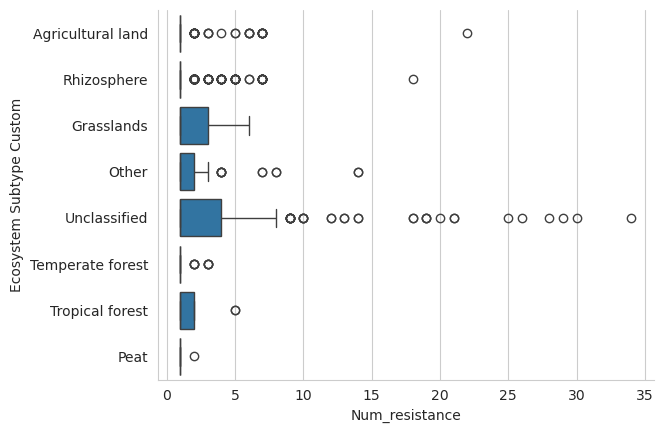

In [46]:
fig, ax = plt.subplots()

sns.boxplot(
    data=df.drop_duplicates(subset=["Plasmid"]),
    y="Ecosystem Subtype Custom",
    x="Num_resistance",
    ax=ax,
)


sns.despine()

<Axes: xlabel='Origin', ylabel='Num_res_kb'>

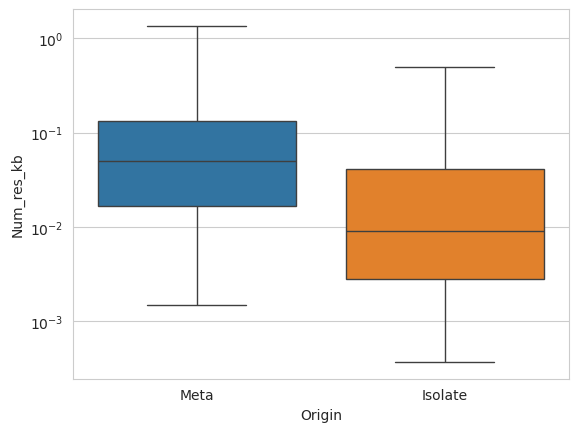

In [47]:
sns.boxplot(
    data=df.drop_duplicates(subset=["Plasmid"]),
    x="Origin",
    y="Num_res_kb",
    hue="Origin",
    log_scale=True,
)

Well, meta plasmids are smaller than Isolate, so they should have more res/kb. What if we get only complete plasmids?

<Axes: xlabel='Origin', ylabel='Num_resistance'>

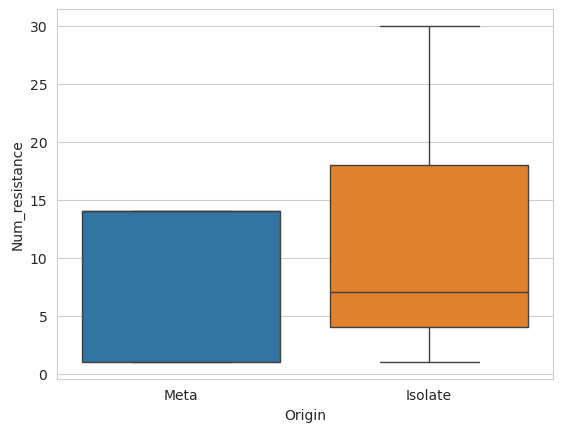

In [48]:
sns.boxplot(
    data=df[df["Complete"] == True],
    x="Origin",
    y="Num_resistance",
    hue="Origin",
)

<Axes: xlabel='Origin', ylabel='Num_res_kb'>

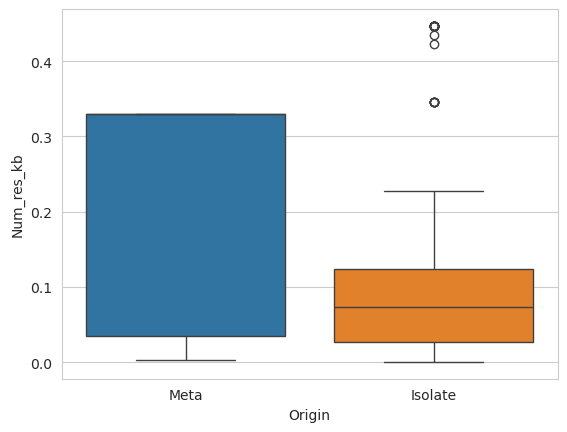

In [49]:
sns.boxplot(
    data=df[df["Complete"] == True],
    x="Origin",
    y="Num_res_kb",
    hue="Origin",
)

In [50]:
stats.mannwhitneyu(
    df[(df["Complete"]) & (df["Origin"] == "Meta")]["Num_resistance"],
    df[(df["Complete"]) & (df["Origin"] == "Isolate")]["Num_resistance"],
    alternative="two-sided",
    nan_policy="omit",
)

MannwhitneyuResult(statistic=12589.5, pvalue=0.5283289759416596)

In [51]:
stats.mannwhitneyu(
    df[(df["Complete"]) & (df["Origin"] == "Meta")]["Num_res_kb"],
    df[(df["Complete"]) & (df["Origin"] == "Isolate")]["Num_res_kb"],
    alternative="greater",
    nan_policy="omit",
)

MannwhitneyuResult(statistic=19531.0, pvalue=5.424902142085921e-08)

In [ ]:
stats.mannwhitneyu(
    df[df["Origin"] == "Meta"]["Num_res_kb"],
    df[df["Origin"] == "Isolate"]["Num_res_kb"],
    alternative="greater",
    nan_policy="omit",
)

In [ ]:
ecosystem_num_res_dict = {
    i: list(
        df[df["Ecosystem Subtype Custom"] == i]
        .drop_duplicates(subset=["Plasmid"])["Num_res_kb"]
        .values
    )
    for i in df.drop_duplicates(subset=["Plasmid"])["Ecosystem Subtype Custom"]
    .dropna()
    .unique()
}

In [ ]:
from scipy import stats

stats.kruskal(
    *[ecosystem_num_res_dict[k] for k in ecosystem_num_res_dict], nan_policy="omit"
)

In [ ]:
import scikit_posthocs as sp

dunn_test = sp.posthoc_dunn(
    df[df["Ecosystem Subtype Custom"].notna()].drop_duplicates(subset=["Plasmid"]),
    val_col="Num_res_kb",
    group_col="Ecosystem Subtype Custom",
    p_adjust="holm",
)

dunn_test

In [ ]:
dunn_test[dunn_test < 0.05]

In [ ]:
df.drop_duplicates(subset=["Plasmid", "Class_custom"])[
    "Element type"
].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=140, wedgeprops=dict(width=0.3)
)

In [ ]:
df.groupby("Plasmid")["Class_custom"].unique().apply(lambda x: len(x)).plot(
    kind="hist"
).set_title("Number of resistance classes per plasmid")

Is this due to cost of maintaining different systems? Though plasmids are very "modular", the evolutionary pressures may be to cells keep only what they actually need for their environment, so either plasmids with many classes are lost, or they lose the genes and keep what they need. This is commonly seen on wet lab also, where if the selective pressure is removed from the media, cells lose their plasmid.

"RC plasmids are usually cryptic or carry only a single resistance gene" (https://journals.asm.org/doi/10.1128/cmr.00088-17)

In [ ]:
a = df.groupby("Plasmid")["Class_custom"].unique().apply(lambda x: len(x))

a[a > 1].index

In [ ]:
df[df["Plasmid"].isin(a[a > 1].index)].groupby("Plasmid")["Class_custom"].unique()

In [ ]:
df[df["Plasmid"].isin(a[a > 1].index)][
    ["Plasmid", "Ecosystem Subtype", "Ecosystem Subtype Custom"]
]

In [ ]:
df_more_one_res_class = (
    pd.DataFrame(
        df[df["Plasmid"].isin(a[a > 1].index)]
        .groupby("Plasmid")["Class_custom"]
        .unique()
    )
    .join(
        pd.DataFrame(
            df[df["Plasmid"].isin(a[a > 1].index)]
            .groupby("Plasmid")["Element subtype"]
            .unique()
        )
    )
    .join(
        df[df["Plasmid"].isin(a[a > 1].index)][
            ["Plasmid", "Ecosystem Subtype", "Ecosystem Subtype Custom"]
        ].set_index("Plasmid")
    )
)

df_more_one_res_class = df_more_one_res_class[~df_more_one_res_class.index.duplicated()]
df_more_one_res_class.head()

In [ ]:
# sort the classes inside the list
df_more_one_res_class["Class_custom"] = df_more_one_res_class["Class_custom"].apply(
    lambda x: ",".join(x)
)

df_more_one_res_class["Element subtype"] = df_more_one_res_class[
    "Element subtype"
].apply(lambda x: ",".join(x))

df_more_one_res_class.head()

In [ ]:
from upsetplot import UpSet, from_memberships

test = from_memberships(
    df_more_one_res_class[
        ~df_more_one_res_class["Ecosystem Subtype Custom"].isin(
            ["Unclassified", "Other"]
        )
    ].Class_custom.str.split(","),
    data=df_more_one_res_class[
        ~df_more_one_res_class["Ecosystem Subtype Custom"].isin(
            ["Unclassified", "Other"]
        )
    ],
)

upset = UpSet(test, sort_by="cardinality", intersection_plot_elements=0)
upset.add_stacked_bars(
    by="Ecosystem Subtype Custom", title="Count by ecosystem", elements=10
)
upset.plot()

In [ ]:
full_class = (
    df.drop_duplicates(subset=["Plasmid", "Class_custom"])
    .groupby("Plasmid")["Class_custom"]
    .unique()
)

full_class = pd.DataFrame(full_class).join(
    df.set_index("Plasmid")["Ecosystem Subtype Custom"]
)
full_class["Class_custom"] = full_class["Class_custom"].apply(lambda x: ",".join(x))

full_class = full_class[~full_class.index.duplicated()]

test = from_memberships(
    full_class[
        ~full_class["Ecosystem Subtype Custom"].isin(["Unclassified", "Other"])
    ].Class_custom.str.split(","),
    data=full_class[
        ~full_class["Ecosystem Subtype Custom"].isin(["Unclassified", "Other"])
    ],
)

upset = UpSet(test, sort_by="cardinality", intersection_plot_elements=0)
upset.add_stacked_bars(
    by="Ecosystem Subtype Custom", title="Count by ecosystem", elements=10
)
upset.plot()

In [ ]:
b

In [ ]:
fig, ax = plt.subplots()

b = (
    df.drop_duplicates(subset=["Plasmid"])
    .groupby(["f__"])["Ecosystem Subtype Custom"]
    .value_counts()
    .unstack()
)
b["Total"] = b.sum(axis=1)

# collapse rows in b dataframe not in top 10 as Other
top_9 = b.loc[b["Total"].sort_values(ascending=False).index[:9]]
other = b.loc[b["Total"].sort_values(ascending=False).index[10] :].sum()
other.name = "Other"

b = pd.concat([top_9, pd.DataFrame(other).T])

b.drop("Total", axis=1).apply(lambda x: x / x.sum()).T.plot(
    kind="barh", stacked=True, ax=ax
)

num_plasmids_with_amr_genes_eco = (
    df.drop_duplicates(subset=["Plasmid"])
    .groupby("Ecosystem Subtype Custom")
    .size()
    .to_dict()
)

ax.set_yticklabels(
    labels=[
        f"{x.get_text()} ({num_plasmids_with_amr_genes_eco[x.get_text()]})"
        for x in ax.get_yticklabels()
    ]
)

ax.set_title("What are the top organisms carrying AMR plasmids in each Ecosystem?")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

sns.despine(left=True, bottom=True)

In [ ]:
#This one was done by value_counting per ecosystem. So top 5 fams per ecosystem. Then joined into one df

    fig, ax = plt.subplots()
a = (
    df.drop_duplicates(subset=["Plasmid"])
    .groupby(["Ecosystem Subtype Custom"])["f__"]
    .value_counts()
    .groupby(level=0)
    .head(5)
    .unstack()
)
totals = a.sum().to_dict()

# sort by sum and plot
a[a.sum().sort_values().index].apply(lambda x: x / x.sum()).T.plot(
    kind="barh",
    stacked=True,
    title="Top 5 host families per ecosystem proportion",
    ax=ax,
)


ax.set_yticklabels(
    labels=[
        f"{i.get_text()} ({int(totals[i.get_text()])})" for i in ax.get_yticklabels()
    ]
)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
sns.despine(fig, left=True, bottom=True)

In [ ]:
# Not as useful when we have the upsetplot

# fig, ax = plt.subplots()
# df.drop_duplicates(subset=["Plasmid", "Class_custom"]).groupby(
#     "Ecosystem Subtype Custom"
# )["Element type"].value_counts().unstack().apply(lambda x: x / x.sum(), axis=1).plot(
#     kind="barh", stacked=True, ax=ax
# )

# ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# sns.despine(left=True, bottom=True)

In [ ]:
df_res_fixed

In [ ]:
fig, ax = plt.subplots()
df_res_fixed.drop(
    ["Origin", "novelty", "Latitude", "Longitude", "f__"], axis=1
).groupby("Ecosystem Subtype Custom").sum().apply(lambda x: x / x.sum(), axis=1).plot(
    kind="barh", stacked=True, ax=ax, colormap="tab20"
)

ax.set_yticklabels(
    [
        f'{x.get_text()} ({df_res_fixed["Ecosystem Subtype Custom"][df_res_fixed["Ecosystem Subtype Custom"]==x.get_text()].count()})'
        for x in ax.get_yticklabels()
    ]
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
sns.despine(left=True, bottom=True)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

df_res_fixed_melted = df_res_fixed.drop(["Origin", "f__"], axis=1).melt(
    id_vars=["Latitude", "Longitude", "Ecosystem Subtype Custom"],
    var_name="Resistance",
    value_name="Present",
)

# Filter for rows where resistance is present
df_res_fixed_melted = df_res_fixed_melted[
    (df_res_fixed_melted["Present"])
    & df_res_fixed_melted["Ecosystem Subtype Custom"].isin(
        [
            "Boreal forest/Taiga",
            "Agricultural land",
            "Rhizosphere",
            "Grasslands",
            "Peat",
            "Tropical Forest",
        ]
    )
]


# Create the base map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(ax=ax, color="white", edgecolor="lightgrey")

# Plot using Seaborn
sns.scatterplot(
    data=df_res_fixed_melted,
    y="Latitude",
    x="Longitude",
    hue="Resistance",
    style="Ecosystem Subtype Custom",
    ax=ax,
)

plt.axis("off")
# Adjust legend and plot display settings as needed
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

df_res_fixed_melted = df_res_fixed.drop(
    ["Origin", "Ecosystem Subtype Custom", "iphop_host_f__"], axis=1
).melt(id_vars=["Latitude", "Longitude"], var_name="Resistance", value_name="Present")

# Filter for rows where resistance is present
df_res_fixed_melted = df_res_fixed_melted[df_res_fixed_melted["Present"]]


# Create the base map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(ax=ax, color="white", edgecolor="lightgrey")

# Plot using Seaborn
sns.scatterplot(
    data=df_res_fixed_melted[df_res_fixed_melted["Resistance"] == "MERCURY"],
    y="Latitude",
    x="Longitude",
    hue="Resistance",
    ax=ax,
)

plt.axis("off")
# Adjust legend and plot display settings as needed
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

No adjustment maps

In [ ]:
df_amr_for_map = (
    df.groupby("Plasmid")["Class_custom"]
    .value_counts()
    .unstack()
    .fillna(0)
    .join(df.set_index("Plasmid")[["Latitude", "Longitude"]])
)

df_amr_for_map_melted = df_amr_for_map.melt(
    id_vars=["Latitude", "Longitude"], var_name="Resistance", value_name="Value"
)

fig, ax = plt.subplots(figsize=(15, 10))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(ax=ax, color="white", edgecolor="lightgrey")

# Create the scatter plot using Seaborn
sns.scatterplot(
    x="Longitude",
    y="Latitude",
    hue="Resistance",
    size="Value",
    sizes=(50, 500),
    data=df_amr_for_map_melted[df_amr_for_map_melted["Value"] > 0],
    ax=ax,
)

# Set title and labels
plt.axis("off")


# Adjust legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()

In [ ]:
df_amr_for_map = (
    df.groupby("Plasmid")["Class_custom"]
    .value_counts()
    .unstack()
    .fillna(0)
    .join(df.set_index("Plasmid")[["Latitude", "Longitude"]])
)

df_amr_for_map_melted = df_amr_for_map.melt(
    id_vars=["Latitude", "Longitude"], var_name="Resistance", value_name="Value"
)

fig, ax = plt.subplots(figsize=(15, 10))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(ax=ax, color="white", edgecolor="lightgrey")

# Create the scatter plot using Seaborn
sns.scatterplot(
    x="Longitude",
    y="Latitude",
    hue="Resistance",
    data=df_amr_for_map_melted[df_amr_for_map_melted["Value"] > 0]
    .drop("Value", axis=1)
    .drop_duplicates(),  # remove China strange latitudes
    ax=ax,
)

# Set title and labels
plt.axis("off")


# Adjust legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()

In [ ]:
df_amr_for_map = (
    df.groupby("Plasmid")["Class_custom"]
    .value_counts()
    .unstack()
    .fillna(0)
    .join(df.set_index("Plasmid")[["Latitude", "Longitude"]])
)

df_amr_for_map_melted = df_amr_for_map.melt(
    id_vars=["Latitude", "Longitude"], var_name="Resistance", value_name="Value"
)

fig, ax = plt.subplots(figsize=(15, 10))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(ax=ax, color="white", edgecolor="lightgrey")

# Create the scatter plot using Seaborn
sns.scatterplot(
    x="Longitude",
    y="Latitude",
    hue="Resistance",
    size="Value",
    sizes=(50, 500),
    data=df_amr_for_map_melted[
        (df_amr_for_map_melted["Resistance"] == "MERCURY")
        & (df_amr_for_map_melted["Value"] > 0)
    ],  # remove China strange latitudes
    ax=ax,
)

# Set title and labels
plt.axis("off")


# Adjust legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df_host["iphop_host"].apply(lambda x: x.split(";")[1]).unique()

In [ ]:
df["iphop_host_p__"].unique()

In [ ]:
df.groupby(["Ecosystem Subtype Custom", "iphop_host_f__"])[
    "Class_custom"
].value_counts().unstack().plot(kind="barh", stacked=True)

In [ ]:
df_amr_classes = (
    df.groupby("Ecosystem Subtype Custom")["Class_custom"].value_counts().unstack()
)
df_amr_classes.head()

In [ ]:
fig, ax = plt.subplots()
df_amr_classes.apply(lambda x: x / x.sum(), axis=1).plot(
    kind="barh", stacked=True, ax=ax
)
ax.set_ylabel("")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
sns.despine(left=True, bottom=True)

Get top 10 families, their ecosystems and their AMR, to create a CIRCOS plot

In [ ]:
df["iphop_host_f__"].value_counts()

In [ ]:
fig, ax = plt.subplots()
df[df["Element type"] == "STRESS"].groupby(
    ["Ecosystem Subtype Custom", "iphop_host_f__"]
)["Num_res_kb"].mean().unstack().plot(kind="barh", stacked=True, ax=ax)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [ ]:
fig, ax = plt.subplots()

df.groupby(["Ecosystem Subtype Custom", "iphop_f__"])["Num_amr_kb"].mean().sort_values(
    ascending=False
).plot(kind="bar", ax=ax, color="#277F8E")
ax.set_ylabel("AMR genes per Kb")
sns.despine()

grouped_df = (
    df.groupby(["Origin", "Ecosystem Subtype Custom", "Subclass"])
    .size()
    .reset_index(name="counts")
)
grouped_df["Subclass_fixed"] = grouped_df["Subclass"].apply(lambda x: x.split("/")[0])

plot = (
    ggplot(
        data=grouped_df.rename(columns={"Ecosystem Subtype Custom": "Ecosystem"}),
        mapping=aes(x="Origin", y="counts", fill="Subclass_fixed"),
    )
    + geom_bar(stat="identity", position="stack")
    + facet_wrap("~Ecosystem", scales="free_y")
    + theme(axis_text_x=element_text(rotation=45), figure_size=(16, 8))
    + labs(x="Origin", y="Count", fill="AMR Subclass")
)


print(plot)

---

In [ ]:
df_rgi = pd.read_csv("card/results.tsv", sep="\t")

df_rgi["taxon_oid"] = df_rgi["Contig"].apply(
    lambda x: x.split("|")[0] if "IMGPR" not in x else x.split("_")[2]
)
df_rgi["Origin"] = df_rgi["Contig"].apply(
    lambda x: "Isolate" if "IMGPR" in x else "Meta"
)
df_rgi.head()

In [ ]:
df_rgi.columns

In [ ]:
df_rgi_use = df_rgi[
    [
        "taxon_oid",
        "Contig",
        "ARO",
        "AMR Gene Family",
        "Drug Class",
        "Antibiotic",
        "Resistance Mechanism",
        "Origin",
    ]
]

In [ ]:
df_rgi_use = (
    df_rgi_use.set_index("taxon_oid")
    .join(df_map.set_index("taxon_oid").drop("Origin", axis=1), on="taxon_oid")
    .dropna(how="all")
)

In [ ]:
df_rgi_use.head()

In [ ]:
plot = (
    ggplot(
        data=grouped_df.rename(columns={"Ecosystem Subtype Custom": "Ecosystem"}),
        mapping=aes(x="Origin", y="counts", fill="Resistance Mechanism"),
    )
    + geom_bar(stat="identity", position="stack")
    + facet_wrap("~Ecosystem", scales="free_y")
    + theme(axis_text_x=element_text(rotation=45), figure_size=(16, 8))
    + labs(x="Origin", y="Count", fill="Resistance Mechanism")
)


print(plot)

Bubble chart

In [ ]:
import seaborn.objects as so

In [ ]:
grouped_df = (
    df_rgi_use.groupby(["Origin", "Ecosystem Subtype Custom", "Resistance Mechanism"])
    .size()
    .reset_index(name="counts")
)
grouped_df["Classes"] = grouped_df["counts"].apply(
    lambda x: 1 if x < 50 else 2 if x >= 50 and x < 100 else 3
)

fig, ax = plt.subplots(figsize=(12, 4))


plot = (
    so.Plot(
        grouped_df,
        x="Ecosystem Subtype Custom",
        y="Resistance Mechanism",
        color="Origin",
        pointsize="Classes",
    )
    .add(so.Dot(fill=False))
    .on(ax)
).plot()

ax.xaxis.set_tick_params(rotation=45)

plot.show()
# plot.save("rgi.pdf", bbox_inches="tight")

In [ ]:
grouped_df

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(
    data=grouped_df,
    x="Ecosystem Subtype Custom",
    y="Resistance Mechanism",
    size="counts",
    hue="Origin",
    alpha=0.5,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)